# 로지스틱 회귀 연습분제
## 문제 1
피마 인디언 당뇨병 발병여부를 예측할 수 있는 분석 모델을 구현하기 위해 아래와 같은 항목들을 조사하였다. 분석하라.

|변수|	설명|
|--|--|
|Pregnancies	|임신횟수|
|Glucose	|포도당 부하 검사 수치|
|BloodPressure|	혈압|
|SkinThickness|	팔 삼두근 뒤쪽의 피하지방 측정값|
|Insulin	|혈청 인슐린|
|BMI|	체질량 지수|
|DiabetesPedigreeFunction|	당뇨 내력 가중치 값|
|Age	|나이|
|Outcome|	당뇨여부(0 또는 1)|

단, 모든 독립변수는 명목형 변수를 포함하지 않으며 정규분포를 만족한다고 가정한다.

In [17]:
import pandas as pd
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, f1_score,recall_score
from patsy import dmatrix
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import sys


### 데이터 불러오기 


In [18]:
df = pd.read_excel("https://data.hossam.kr/E05/indian_diabetes.xlsx")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 데이터 전처리 

In [19]:
## 데이터 표준화 ㄱㄱ 

scaler = StandardScaler()
df['Pregnancies']= scaler.fit_transform(df[['Pregnancies']])
df['Glucose']= scaler.fit_transform(df[['Glucose']])
df['BloodPressure']= scaler.fit_transform(df[['BloodPressure']])
df['SkinThickness']= scaler.fit_transform(df[['SkinThickness']])
df['Insulin']= scaler.fit_transform(df[['Insulin']])
df['BMI']= scaler.fit_transform(df[['BMI']])
df['DiabetesPedigreeFunction']= scaler.fit_transform(df[['DiabetesPedigreeFunction']])
df['Age']= scaler.fit_transform(df[['Age']])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


### 로지스틱 회귀분석 진행

In [20]:
model = logit('Outcome ~ Pregnancies + Glucose + BloodPressure +SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age',data = df)
fit = model.fit()

print(fit.summary())
### 설명력 0.2718

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.2718
Time:                        15:43:47   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

In [21]:
### 로지스틱 회귀 설명력 
fit.prsquared

0.27180966859224587

In [22]:
### 예측결과를 데이터 프레임에 추가 
df['예측값'] = fit.predict(df.drop('Outcome',axis=1))
df['예측결과'] =df['예측값'] > 0.5 

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,예측값,예측결과
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0.721727,True
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0.048642,False
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,0.796702,True
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0.041625,False
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,0.902184,True
...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0,0.317115,False
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0,0.318969,False
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0,0.170416,False
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1,0.284976,False


In [23]:
### 혼동행렬 구하기

cm = confusion_matrix(df['Outcome'],df['예측결과'])
tn,tp,fn,fp = cm.ravel()

cmdf = pd.DataFrame(cm,index = ['True','False'], columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,445,55
False,112,156


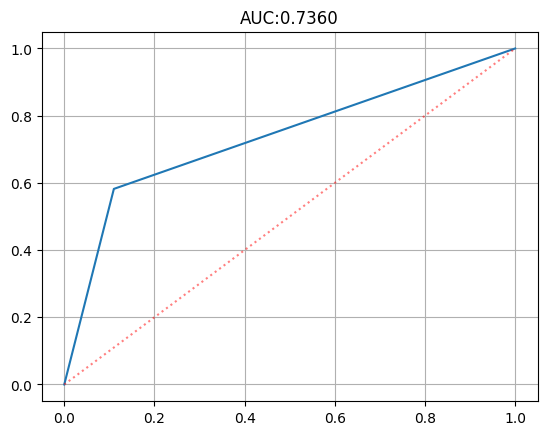

In [24]:
### ROC Curve 시각솨

ras = roc_auc_score(df['Outcome'],df['예측결과'])

fpr, tpr, threshold = roc_curve(df['Outcome'],df['예측결과'])
plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()

## 문제 2
다음의 데이터는 타이타닉 탑승객 명단 데이터이다. 적절한 데이터 전처리와 정제를 수행한 후 분석하라.

|변수명|	설명|
|--|--|
|PassengerId|	탑승객의 ID(인덱스와 같은 개념)
|Survived|	생존유무(0은 사망 1은 생존)|
|Pclass	|객실의 등급|
|Name|	이름|
|Sex	|성별|
|SibSp	|동승한 형제 혹은 배우자의 수|
|Parch	|동승한 자녀 혹은 부모의 수|
|Ticket	|티켓번호|
|Fare	|요금|
|Cabin	|선실|
|Embarked|	탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton)|

### 데이터 불러오기 


In [25]:
df = pd.read_excel("https://data.hossam.kr/E05/titanic.xlsx")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 확인
- 필요없는 칼럼 제거 : PassengerId , Name ,Ticket
----------------------------------------------------
- 종속변수 : Survived
- 명목형 : Pclass, Sex, Cabin, Embarked
- 연속형 : Age, SibSp, Parch, Fare
------------------------------------------------



In [26]:
### 필요없는 칼럼 제거

df = df.drop(['PassengerId','Name','Ticket'],axis=1)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [28]:
### 결측치 확인 
df.isnull().sum()
#  cabin 은 결측치 너무 많음 -> 없앰 



df = df.drop('Cabin',axis=1)


In [29]:
## Age 평균으로 대체 ,


mean_age = df['Age'].mean()

df.loc[df['Age'].isnull(),"Age"] = mean_age

In [30]:
## embark : 최빈값으로 대체 
mode_embark = df['Embarked'].mode()
print(mode_embark)
df.loc[df['Embarked'].isnull(),"Embarked"] ="S"

0    S
Name: Embarked, dtype: object


### 데이터 전처리 
- 종속변수 : Survived
- 명목형 : Pclass, Sex, Cabin, Embarked
- 연속형 : Age, SibSp, Parch, Fare

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
### 표준화 
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['SibSp'] = scaler.fit_transform(df[['SibSp']])
df['Parch'] = scaler.fit_transform(df[['Parch']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,male,-0.207709,-0.474545,-0.473674,-0.386671,S
887,1,1,female,-0.823344,-0.474545,-0.473674,-0.044381,S
888,0,3,female,0.000000,0.432793,2.008933,-0.176263,S
889,1,1,male,-0.284663,-0.474545,-0.473674,-0.044381,C


In [38]:
### 명목형 변수의 더미변수화 
df2 = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df2

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.592481,0.432793,-0.473674,-0.502445,False,True,True,False,True
1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False,False,False
2,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True,False,False,True
3,1,0.407926,0.432793,-0.473674,0.420730,False,False,False,False,True
4,0,0.407926,-0.474545,-0.473674,-0.486337,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207709,-0.474545,-0.473674,-0.386671,True,False,True,False,True
887,1,-0.823344,-0.474545,-0.473674,-0.044381,False,False,False,False,True
888,0,0.000000,0.432793,2.008933,-0.176263,False,True,False,False,True
889,1,-0.284663,-0.474545,-0.473674,-0.044381,False,False,True,False,False


In [40]:
model = logit('Survived ~ Age + SibSp + Parch +Fare + Pclass_2 + Pclass_3 + Sex_male + Embarked_Q +Embarked_S ',data = df2)
fit = model.fit()

print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.440153
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.3390
Time:                        15:51:36   Log-Likelihood:                -392.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.420e-81
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8113      0.315      8.917      0.000       2.193       3.429
Pclas

In [41]:
### 로지스틱 회귀 설명력 
fit.prsquared

0.33902209558002816

In [43]:
### 예측결과를 데이터 프레임에 추가 
df2['예측값'] = fit.predict(df2.drop('Survived',axis=1))
df2['예측결과'] = df2['예측값']>0.5
df2

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,예측값,예측결과
0,0,-0.592481,0.432793,-0.473674,-0.502445,False,True,True,False,True,0.084987,False
1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False,False,False,0.921244,True
2,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True,False,False,True,0.625032,True
3,1,0.407926,0.432793,-0.473674,0.420730,False,False,False,False,True,0.890425,True
4,0,0.407926,-0.474545,-0.473674,-0.486337,False,True,True,False,True,0.071804,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207709,-0.474545,-0.473674,-0.386671,True,False,True,False,True,0.266745,False
887,1,-0.823344,-0.474545,-0.473674,-0.044381,False,False,False,False,True,0.952161,True
888,0,0.000000,0.432793,2.008933,-0.176263,False,True,False,False,True,0.471149,False
889,1,-0.284663,-0.474545,-0.473674,-0.044381,False,False,True,False,False,0.607858,True


In [45]:
## 혼동행렬 구학 ㅣ
cm = confusion_matrix(df2['Survived'],df2['예측결과'])
tn,tp,fn,fp = cm.ravel()

cmdf = pd.DataFrame(cm,index = ['True','False'], columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,476,73
False,102,240


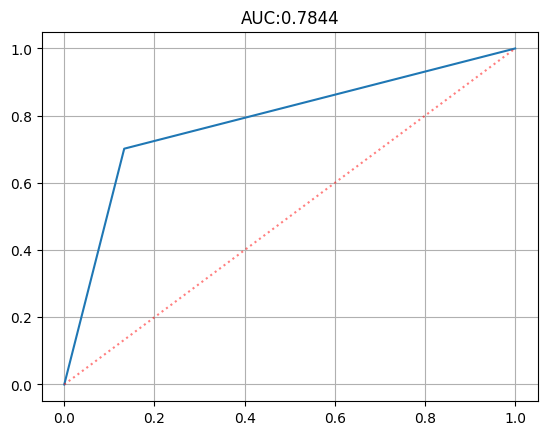

In [49]:
### ROC Curve 시각솨

ras = roc_auc_score(df2['Survived'],df2['예측결과'])

fpr, tpr, threshold = roc_curve(df2['Survived'],df2['예측결과'])
plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()